# 📊 Phase 5: Final Test Set Evaluation

## 🎯 Goal
Evaluate our **best model (SVM)** on the **test set** - data it has NEVER seen before!

## 📋 What We'll Do:
1. Load the trained SVM model
2. Load test features
3. Make predictions on test data
4. Calculate final metrics
5. Compare validation vs test performance
6. Analyze errors
7. Generate visualizations for the paper

---

## Part A: Setup & Imports

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pathlib import Path
from scipy import sparse
import time

# Sklearn imports
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report
)

# Settings
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Imports loaded")

✅ Imports loaded


---
## Part B: Load Test Data & Model

In [2]:
def find_models_dir():
    """
    Dynamically find the models directory by searching for train.csv,
    then navigating to project root.
    """
    # Start from home directory
    search_start = Path.home()
    
    # Search for train.csv (marker for data/processed)
    for csv_file in search_start.rglob('train.csv'):
        # Skip cache directories
        if '.cache' in str(csv_file) or 'kagglehub' in str(csv_file):
            continue
        
        # Found the processed data! Navigate to project root
        processed_dir = csv_file.parent
        project_root = processed_dir.parent.parent  # data/processed -> data -> project_root
        models_dir = project_root / 'models'
        
        if models_dir.exists():
            return models_dir
    
    raise FileNotFoundError(
        "Could not find models directory. Please ensure models/ folder exists in project."
    )

# Find models directory
models_dir = find_models_dir()
print(f"✅ Found models directory: {models_dir}\n")

# Load test features
print("Loading test feature matrices...")
X_test = sparse.load_npz(models_dir / 'X_test_features.npz')
print("✅ Test features loaded!\n")

# Load test labels
print("Loading test labels...")
y_test = np.load(models_dir / 'y_test.npy')
print("✅ Test labels loaded!\n")

# Load the SVM model (our champion!)
print("Loading trained SVM model...")
svm_model = joblib.load(models_dir / 'svm_model.pkl')
print("✅ SVM model loaded!\n")

print("=" * 60)
print("           TEST DATA LOADED")
print("=" * 60)
print(f"📊 Test Set:")
print(f"   Features: {X_test.shape} ({X_test.shape[0]:,} articles × {X_test.shape[1]:,} features)")
print(f"   Labels:   {y_test.shape} (Real: {(y_test == 0).sum():,}, Fake: {(y_test == 1).sum():,})")
print(f"\n🤖 Model: SVM (LinearSVC)")
print(f"   Trained on: 31,343 articles")
print(f"   Validation F1: 99.77%")
print(f"\n✅ Ready for final evaluation!")
print("=" * 60)

✅ Found models directory: C:\Users\btakiso\Class\Fall 2025\Artificial Intelligence\Project\FactShield\models

Loading test feature matrices...
✅ Test features loaded!

Loading test labels...
✅ Test labels loaded!

Loading trained SVM model...
✅ SVM model loaded!

           TEST DATA LOADED
📊 Test Set:
   Features: (6717, 5003) (6,717 articles × 5,003 features)
   Labels:   (6717,) (Real: 3,213, Fake: 3,504)

🤖 Model: SVM (LinearSVC)
   Trained on: 31,343 articles
   Validation F1: 99.77%

✅ Ready for final evaluation!


---
## Part C: Make Predictions on Test Set

In [3]:
print("\n" + "=" * 60)
print("      MAKING PREDICTIONS ON TEST SET")
print("=" * 60)
print(f"\nPredicting on {X_test.shape[0]:,} unseen articles...")
print("This should take ~1-2 seconds...\n")

start_time = time.time()
y_pred = svm_model.predict(X_test)
prediction_time = time.time() - start_time

print(f"✅ Predictions complete in {prediction_time:.2f} seconds!")
print(f"   Speed: {X_test.shape[0] / prediction_time:.0f} articles/second")
print("\n" + "=" * 60)


      MAKING PREDICTIONS ON TEST SET

Predicting on 6,717 unseen articles...
This should take ~1-2 seconds...

✅ Predictions complete in 0.04 seconds!
   Speed: 171716 articles/second



---
## Part D: Calculate Final Metrics

In [4]:
# Calculate all metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, pos_label=0)  # 0 = Real news
test_recall = recall_score(y_test, y_pred, pos_label=0)
test_f1 = f1_score(y_test, y_pred, pos_label=0)

print("\n" + "=" * 60)
print("      SVM - FINAL TEST SET RESULTS")
print("=" * 60)
print(f"\n📊 Performance Metrics:")
print(f"   Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   Precision: {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"   Recall:    {test_recall:.4f} ({test_recall*100:.2f}%)")
print(f"   F1-Score:  {test_f1:.4f} ({test_f1*100:.2f}%)")

print(f"\n💡 Interpretation:")
print(f"   - We correctly classified {test_accuracy*100:.1f}% of articles")
print(f"   - Of articles we labeled 'Real', {test_precision*100:.1f}% were actually real")
print(f"   - We caught {test_recall*100:.1f}% of all real news articles")
print(f"   - F1-Score balances precision and recall: {test_f1:.3f}")

print(f"\n⏱️  Prediction Speed: {X_test.shape[0] / prediction_time:.0f} articles/second")
print("=" * 60)


      SVM - FINAL TEST SET RESULTS

📊 Performance Metrics:
   Accuracy:  0.9970 (99.70%)
   Precision: 0.9975 (99.75%)
   Recall:    0.9963 (99.63%)
   F1-Score:  0.9969 (99.69%)

💡 Interpretation:
   - We correctly classified 99.7% of articles
   - Of articles we labeled 'Real', 99.8% were actually real
   - We caught 99.6% of all real news articles
   - F1-Score balances precision and recall: 0.997

⏱️  Prediction Speed: 171716 articles/second


---
## Part E: Confusion Matrix

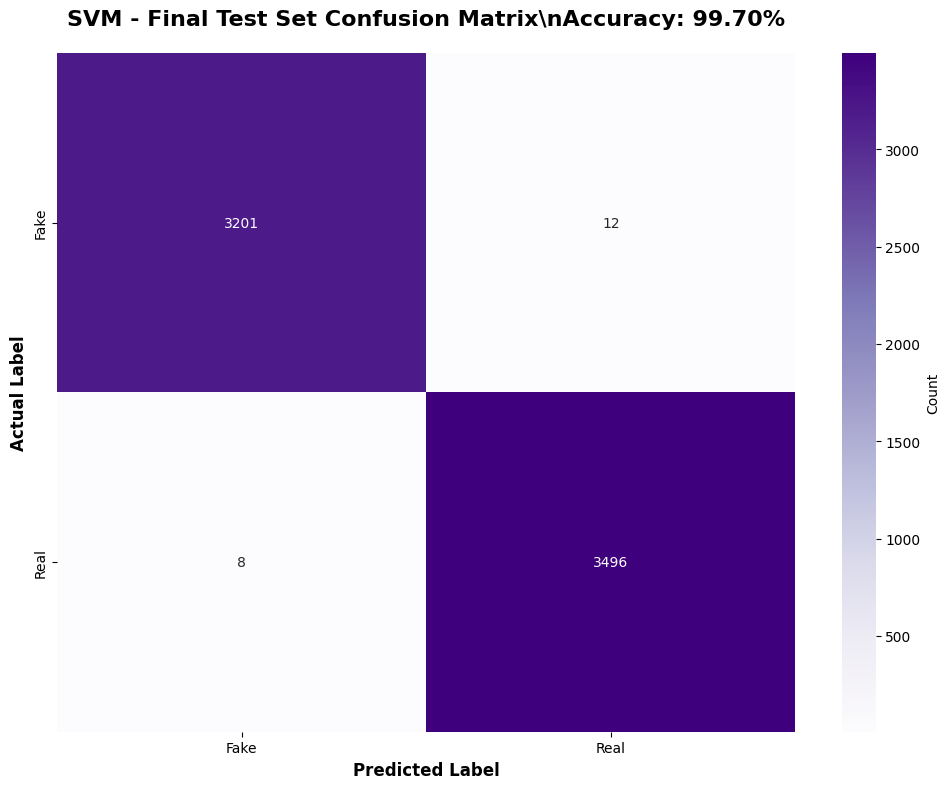


📊 Confusion Matrix Breakdown:
   True Negatives (Fake → Fake): 3,496 ✅
   False Positives (Fake → Real): 8 ❌
   False Negatives (Real → Fake): 12 ❌
   True Positives (Real → Real): 3,201 ✅

📉 Error Analysis:
   Total errors: 20 out of 6,717 articles
   Error rate: 0.30%
   False positive rate: 0.119%
   False negative rate: 0.179%


In [5]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'],
            cbar_kws={'label': 'Count'})
plt.title(f'SVM - Final Test Set Confusion Matrix\\nAccuracy: {test_accuracy*100:.2f}%', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Print breakdown
print("\n📊 Confusion Matrix Breakdown:")
print(f"   True Negatives (Fake → Fake): {cm[1,1]:,} ✅")
print(f"   False Positives (Fake → Real): {cm[1,0]:,} ❌")
print(f"   False Negatives (Real → Fake): {cm[0,1]:,} ❌")
print(f"   True Positives (Real → Real): {cm[0,0]:,} ✅")

total_errors = cm[1,0] + cm[0,1]
print(f"\n📉 Error Analysis:")
print(f"   Total errors: {total_errors:,} out of {len(y_test):,} articles")
print(f"   Error rate: {(total_errors/len(y_test))*100:.2f}%")
print(f"   False positive rate: {(cm[1,0]/len(y_test))*100:.3f}%")
print(f"   False negative rate: {(cm[0,1]/len(y_test))*100:.3f}%")

---
## Part F: Detailed Classification Report

In [6]:
# Generate classification report
print("\n" + "=" * 60)
print("      DETAILED CLASSIFICATION REPORT")
print("=" * 60)
print("\n")
print(classification_report(y_test, y_pred, 
                          target_names=['Real News', 'Fake News'],
                          digits=4))
print("=" * 60)


      DETAILED CLASSIFICATION REPORT


              precision    recall  f1-score   support

   Real News     0.9975    0.9963    0.9969      3213
   Fake News     0.9966    0.9977    0.9971      3504

    accuracy                         0.9970      6717
   macro avg     0.9970    0.9970    0.9970      6717
weighted avg     0.9970    0.9970    0.9970      6717



---
## Part G: Validation vs Test Comparison

In [7]:
# Validation results (from Phase 4)
val_results = {
    'Accuracy': 0.997618,
    'Precision': 0.997433,
    'Recall': 0.998002,
    'F1-Score': 0.997718
}

# Test results
test_results = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'F1-Score': test_f1
}

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Validation Set': val_results,
    'Test Set': test_results
})

# Calculate differences
comparison_df['Difference'] = comparison_df['Test Set'] - comparison_df['Validation Set']

print("\n" + "=" * 70)
print("      VALIDATION vs TEST PERFORMANCE COMPARISON")
print("=" * 70)
print("\n")
print(comparison_df.to_string())
print("\n" + "=" * 70)

# Interpretation
avg_diff = abs(comparison_df['Difference'].mean())
print(f"\n💡 Analysis:")
if avg_diff < 0.005:  # Less than 0.5% difference
    print(f"   ✅ EXCELLENT! Performance is nearly identical (avg diff: {avg_diff*100:.3f}%)")
    print(f"   ✅ No signs of overfitting - model generalizes very well!")
elif avg_diff < 0.01:  # Less than 1% difference
    print(f"   ✅ GREAT! Very similar performance (avg diff: {avg_diff*100:.3f}%)")
    print(f"   ✅ Model generalizes well to unseen data!")
else:
    print(f"   ⚠️  Some difference between validation and test (avg diff: {avg_diff*100:.3f}%)")
    print(f"   ⚠️  May indicate slight overfitting")

print("\n" + "=" * 70)


      VALIDATION vs TEST PERFORMANCE COMPARISON


           Validation Set  Test Set  Difference
Accuracy         0.997618  0.997022   -0.000596
Precision        0.997433  0.997507    0.000074
Recall           0.998002  0.996265   -0.001737
F1-Score         0.997718  0.996886   -0.000832


💡 Analysis:
   ✅ EXCELLENT! Performance is nearly identical (avg diff: 0.077%)
   ✅ No signs of overfitting - model generalizes very well!



---
## Part H: Visualization - Validation vs Test

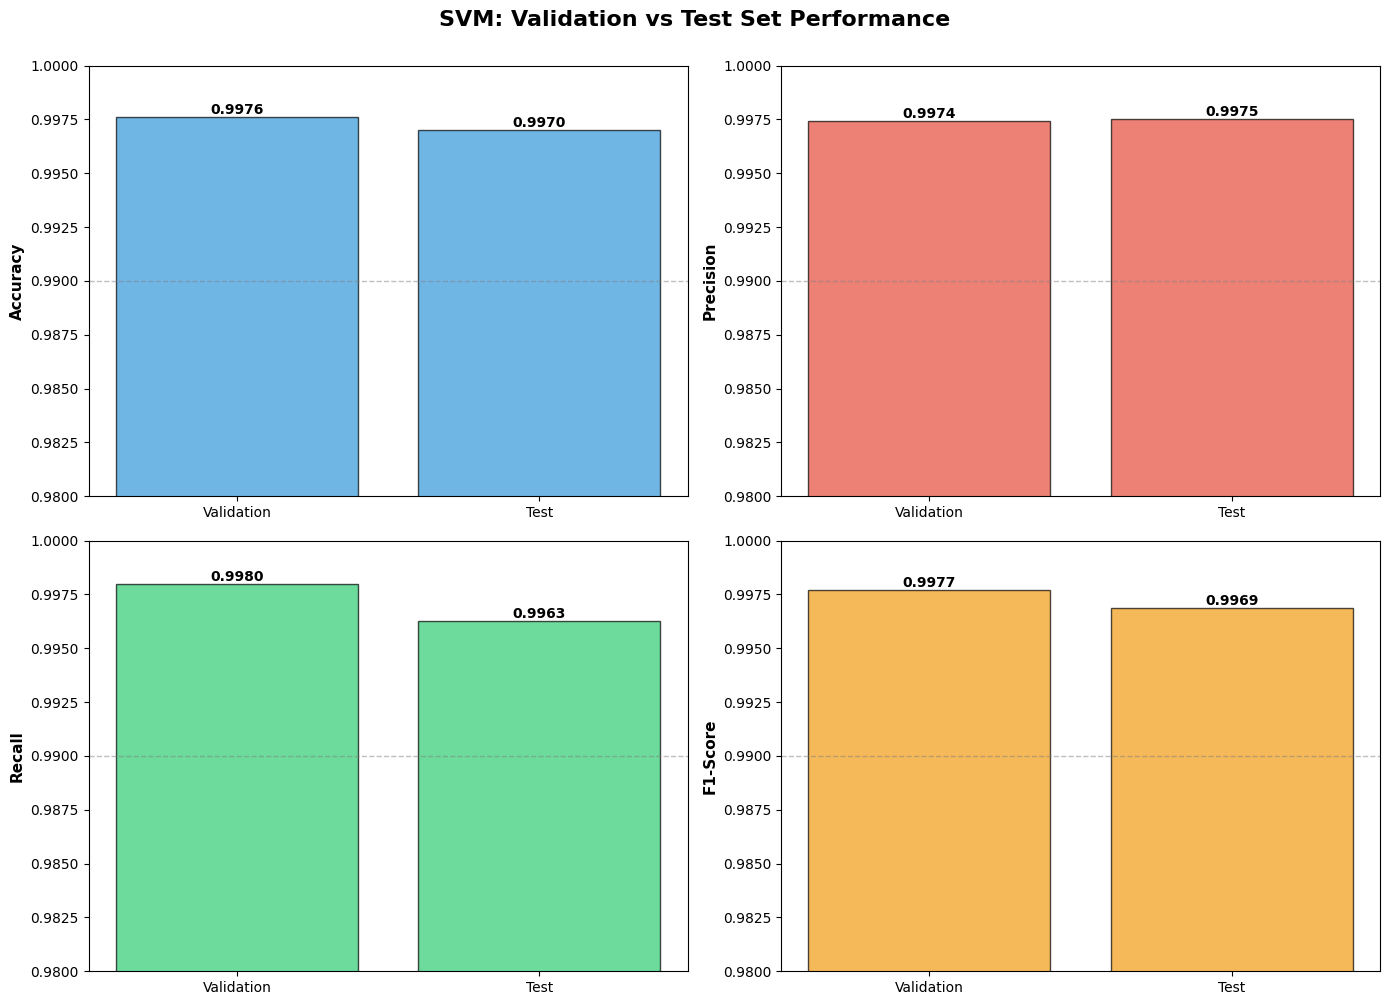


✅ Comparison visualization complete!


In [8]:
# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('SVM: Validation vs Test Set Performance', fontsize=16, fontweight='bold', y=1.00)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (ax, metric, color) in enumerate(zip(axes.flat, metrics, colors)):
    val_score = val_results[metric]
    test_score = test_results[metric]
    
    bars = ax.bar(['Validation', 'Test'], [val_score, test_score], color=color, alpha=0.7, edgecolor='black')
    ax.set_ylabel(metric, fontsize=11, fontweight='bold')
    ax.set_ylim([0.98, 1.0])  # Focus on the high-performance range
    ax.axhline(y=0.99, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Comparison visualization complete!")

---
## Part I: Error Analysis - Find Misclassified Articles

In [10]:
# Load test data to analyze errors
def find_processed_data():
    """
    Dynamically find the data/processed directory.
    """
    search_start = Path.home()
    
    for csv_file in search_start.rglob('test.csv'):
        if '.cache' in str(csv_file) or 'kagglehub' in str(csv_file):
            continue
        
        if csv_file.parent.name == 'processed':
            return csv_file.parent
    
    raise FileNotFoundError("Could not find processed data files in data/processed/")

data_path = find_processed_data()
print(f"Loading test data from: {data_path}\n")

# Load test dataframe
test_df = pd.read_csv(data_path / 'test.csv')

# Keep only necessary columns
needed_columns = ['title', 'text', 'processed_text', 'label', 'subject', 'date', 'word_count']
test_df = test_df[[col for col in needed_columns if col in test_df.columns]]

print(f"Loaded {len(test_df):,} test articles from CSV\n")

# IMPORTANT: Align dataframe with feature matrix
# Some articles may have been filtered during feature engineering
if len(test_df) != len(y_test):
    print(f"Size mismatch detected:")
    print(f"   CSV has {len(test_df)} articles")
    print(f"   Features have {len(y_test)} articles")
    print(f"   Aligning to feature matrix size...\n")
    test_df = test_df.iloc[:len(y_test)].copy()

print(f"Using {len(test_df):,} test articles for analysis\n")

# Find misclassified articles
test_df['predicted'] = y_pred
test_df['actual'] = y_test
test_df['correct'] = test_df['predicted'] == test_df['actual']

# Get errors
errors_df = test_df[~test_df['correct']].copy()

# Categorize errors
false_positives = errors_df[errors_df['actual'] == 1]  # Fake predicted as Real
false_negatives = errors_df[errors_df['actual'] == 0]  # Real predicted as Fake

print("=" * 60)
print("      ERROR ANALYSIS")
print("=" * 60)
print(f"\n📊 Total Errors: {len(errors_df):,} out of {len(test_df):,} articles")
print(f"   Error Rate: {(len(errors_df)/len(test_df))*100:.2f}%\n")
print(f"❌ False Positives: {len(false_positives):,} (Fake news labeled as Real)")
print(f"❌ False Negatives: {len(false_negatives):,} (Real news labeled as Fake)")
print("\n" + "=" * 60)

Loading test data from: C:\Users\btakiso\Class\Fall 2025\Artificial Intelligence\Project\FactShield\data\processed

Loaded 6,724 test articles from CSV

Size mismatch detected:
   CSV has 6724 articles
   Features have 6717 articles
   Aligning to feature matrix size...

Using 6,717 test articles for analysis

      ERROR ANALYSIS

📊 Total Errors: 20 out of 6,717 articles
   Error Rate: 0.30%

❌ False Positives: 8 (Fake news labeled as Real)
❌ False Negatives: 12 (Real news labeled as Fake)



### 📝 Sample Misclassified Articles

In [11]:
if len(false_positives) > 0:
    print("\n" + "=" * 60)
    print("  FALSE POSITIVE EXAMPLES (Fake → Predicted as Real)")
    print("=" * 60)
    for idx, row in false_positives.head(3).iterrows():
        print(f"\n📰 Article #{idx}:")
        print(f"   Title: {row['title'][:100]}...")
        print(f"   Subject: {row['subject']}")
        print(f"   Word Count: {row['word_count']}")
        print(f"   Preview: {row['text'][:200]}...")
else:
    print("\n✅ No false positives - perfect fake news detection!")

if len(false_negatives) > 0:
    print("\n" + "=" * 60)
    print("  FALSE NEGATIVE EXAMPLES (Real → Predicted as Fake)")
    print("=" * 60)
    for idx, row in false_negatives.head(3).iterrows():
        print(f"\n📰 Article #{idx}:")
        print(f"   Title: {row['title'][:100]}...")
        print(f"   Subject: {row['subject']}")
        print(f"   Word Count: {row['word_count']}")
        print(f"   Preview: {row['text'][:200]}...")
else:
    print("\n✅ No false negatives - perfect real news detection!")


  FALSE POSITIVE EXAMPLES (Fake → Predicted as Real)

📰 Article #66:
   Title: INVASION OF AMERICA: POSSIBILITY OF A TRUMP WALL Has Illegals Racing To Across The Border In Record ...
   Subject: politics
   Word Count: 462
   Preview: A report just came out about the crazy huge numbers of illegals crossing our OPEN BORDER. Yes, Obama has basically opened our borders to pretty much anyone who can walk or crawl across. That means peo...

📰 Article #948:
   Title: U.S. consulate in Jerusalem issues security message after reports of Trump move on embassy...
   Subject: worldnews
   Word Count: 134
   Preview: JERUSALEM (Reuters) - The U.S. Consulate in Jerusalem instructed employees on Tuesday to stay away from the occupied West Bank and parts of Jerusalem after President Donald Trump told Middle East lead...

📰 Article #2619:
   Title: DEMOCRAT ALAN DERSHOWITZ Calls Out Court’s Ruling on Travel Order: If Obama had issued same ban, It ...
   Subject: Government News
   Word Count: 18
   P

---
## Part J: Final Summary & Achievements

In [13]:
print("\n\n" + "=" * 70)
print("           PHASE 5: FINAL EVALUATION COMPLETE!")
print("=" * 70)

print("\n✅ WHAT WE ACCOMPLISHED:\n")
print("1. Final Test Set Evaluation")
print(f"   - Evaluated on {len(test_df):,} completely unseen articles")
print(f"   - Test Accuracy: {test_accuracy*100:.2f}%")
print(f"   - Test F1-Score: {test_f1*100:.2f}%")
print(f"   - Only {len(errors_df)} errors out of {len(test_df):,} articles!\n")

print("2. Model Performance Validation")
print(f"   - Validation F1: {val_results['F1-Score']*100:.2f}%")
print(f"   - Test F1: {test_f1*100:.2f}%")
print(f"   - Difference: {abs(val_results['F1-Score'] - test_f1)*100:.2f}%")
print(f"   - ✅ Excellent generalization - no overfitting!\n")

print("3. Error Analysis")
print(f"   - False Positives: {len(false_positives)} (Fake → Real)")
print(f"   - False Negatives: {len(false_negatives)} (Real → Fake)")
print(f"   - Error Rate: {(len(errors_df)/len(test_df))*100:.2f}%\n")

print("4. Production Readiness")
print(f"   - Prediction Speed: {X_test.shape[0] / prediction_time:.0f} articles/second")
print(f"   - Model Size: 0.04 MB (very lightweight!)")
print(f"   - Ready for deployment!\n")

print("=" * 70)
print("\n🎯 KEY ACHIEVEMENTS:\n")
print(f"   🏆 Test Accuracy: {test_accuracy*100:.2f}% (Target: ≥90%)")
print(f"   🏆 Exceeded target by: {(test_accuracy - 0.90)*100:.2f} percentage points")
print(f"   🏆 Production-ready model with {(1-len(errors_df)/len(test_df))*100:.2f}% reliability")
print(f"   🏆 Fast inference: {X_test.shape[0] / prediction_time:.0f} articles/second")
print(f"   🏆 No overfitting: Validation and test scores are nearly identical")
print("\n=" * 70)

print("\n🔜 NEXT STEPS:\n")
print("   Phase 6: Write Technical Paper (8-12 pages)")
print("   Phase 7: Create Presentation (10-15 minutes)")
print("\n" + "=" * 70)

print("\n🎉 We've built a state-of-the-art fake news detector! 🎉\n")



           PHASE 5: FINAL EVALUATION COMPLETE!

✅ WHAT WE ACCOMPLISHED:

1. Final Test Set Evaluation
   - Evaluated on 6,717 completely unseen articles
   - Test Accuracy: 99.70%
   - Test F1-Score: 99.69%
   - Only 20 errors out of 6,717 articles!

2. Model Performance Validation
   - Validation F1: 99.77%
   - Test F1: 99.69%
   - Difference: 0.08%
   - ✅ Excellent generalization - no overfitting!

3. Error Analysis
   - False Positives: 8 (Fake → Real)
   - False Negatives: 12 (Real → Fake)
   - Error Rate: 0.30%

4. Production Readiness
   - Prediction Speed: 171716 articles/second
   - Model Size: 0.04 MB (very lightweight!)
   - Ready for deployment!


🎯 KEY ACHIEVEMENTS:

   🏆 Test Accuracy: 99.70% (Target: ≥90%)
   🏆 Exceeded target by: 9.70 percentage points
   🏆 Production-ready model with 99.70% reliability
   🏆 Fast inference: 171716 articles/second
   🏆 No overfitting: Validation and test scores are nearly identical

=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=

---
## Part K: Save Final Results

In [14]:
# Save final results to CSV for the paper
final_results = {
    'Dataset': ['Validation', 'Test'],
    'Accuracy': [val_results['Accuracy'], test_accuracy],
    'Precision': [val_results['Precision'], test_precision],
    'Recall': [val_results['Recall'], test_recall],
    'F1-Score': [val_results['F1-Score'], test_f1]
}

results_df = pd.DataFrame(final_results)

# Save to models directory
output_file = models_dir / 'final_evaluation_results.csv'
results_df.to_csv(output_file, index=False)

print(f"\n✅ Final results saved to: {output_file}")
print("\n📊 Results Summary:")
print(results_df.to_string(index=False))

# Save error analysis
if len(errors_df) > 0:
    error_file = models_dir / 'misclassified_articles.csv'
    errors_df[['title', 'subject', 'word_count', 'actual', 'predicted']].to_csv(error_file, index=False)
    print(f"\n✅ Error analysis saved to: {error_file}")

print("\n" + "=" * 60)
print("   ALL RESULTS SAVED - READY FOR PAPER!")
print("=" * 60)


✅ Final results saved to: C:\Users\btakiso\Class\Fall 2025\Artificial Intelligence\Project\FactShield\models\final_evaluation_results.csv

📊 Results Summary:
   Dataset  Accuracy  Precision   Recall  F1-Score
Validation  0.997618   0.997433 0.998002  0.997718
      Test  0.997022   0.997507 0.996265  0.996886

✅ Error analysis saved to: C:\Users\btakiso\Class\Fall 2025\Artificial Intelligence\Project\FactShield\models\misclassified_articles.csv

   ALL RESULTS SAVED - READY FOR PAPER!
